# BayesianRidge

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('test.CSV')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['id'])
df = df.drop(columns=['Arrival Delay in Minutes'])
df = df.drop(columns=['Flight Distance'])
df = df.drop(columns=['Departure/Arrival time convenient'])
df = df.drop(columns=['Ease of Online booking'])
df = df.drop(columns=['Gate location'])

In [33]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,5,3,4,3,5,5,5,5,2,5,5,50,satisfied
1,Female,Loyal Customer,36,Business travel,Business,1,5,4,5,4,4,4,4,3,4,5,0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,2,2,2,2,2,4,1,3,2,2,2,0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,0,3,4,4,1,1,1,1,3,1,4,0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,2,4,1,2,2,2,2,2,4,2,4,0,satisfied


In [34]:
df.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
25971,Male,disloyal Customer,34,Business travel,Business,3,4,3,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,4,4,4,4,4,4,5,5,5,5,4,0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,2,2,1,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,3,4,4,4,4,3,2,5,4,5,4,0,satisfied
25975,Female,Loyal Customer,42,Personal Travel,Eco,2,4,2,2,1,1,2,1,1,1,1,0,neutral or dissatisfied


In [35]:
print(df.isnull().sum())

Gender                        0
Customer Type                 0
Age                           0
Type of Travel                0
Class                         0
Inflight wifi service         0
Food and drink                0
Online boarding               0
Seat comfort                  0
Inflight entertainment        0
On-board service              0
Leg room service              0
Baggage handling              0
Checkin service               0
Inflight service              0
Cleanliness                   0
Departure Delay in Minutes    0
satisfaction                  0
dtype: int64


In [36]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [37]:
df=df.dropna()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      25976 non-null  object
 1   Customer Type               25976 non-null  object
 2   Age                         25976 non-null  int64 
 3   Type of Travel              25976 non-null  object
 4   Class                       25976 non-null  object
 5   Inflight wifi service       25976 non-null  int64 
 6   Food and drink              25976 non-null  int64 
 7   Online boarding             25976 non-null  int64 
 8   Seat comfort                25976 non-null  int64 
 9   Inflight entertainment      25976 non-null  int64 
 10  On-board service            25976 non-null  int64 
 11  Leg room service            25976 non-null  int64 
 12  Baggage handling            25976 non-null  int64 
 13  Checkin service             25976 non-null  in

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Gender','Customer Type','Type of Travel','Class','satisfaction']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [40]:
x1 = df.drop(labels='satisfaction', axis=1)
y1 = df.loc[:,'satisfaction']

In [41]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 14573, 1: 11403})
OVER SAMPLING DATA COUNT  :  Counter({1: 14573, 0: 14573})


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  23316
NUMBER OF TEST DATASET      :  5830
TOTAL NUMBER OF DATASET    :  29146


In [43]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  23316
NUMBER OF TEST DATASET      :  5830
TOTAL NUMBER OF DATASET    :  29146


In [44]:
from sklearn.linear_model import BayesianRidge

In [45]:
BC = BayesianRidge()
BC.fit(x_train,y_train)

BayesianRidge()

In [46]:
predicted = BC.predict(x_test)

In [47]:
predicted_classes = np.round(predicted).astype(int)

In [48]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted_classes)
print('THE CLASSIFICATION REPORT OF BayesianRidge:\n\n',cr)

THE CLASSIFICATION REPORT OF BayesianRidge:

               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.86      0.86      0.86      2915
           1       0.86      0.86      0.86      2915

    accuracy                           0.86      5830
   macro avg       0.57      0.57      0.57      5830
weighted avg       0.86      0.86      0.86      5830



In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
print('THE CONFUSION MATRIX SCORE OF BayesianRidge:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF BayesianRidge:


 [[   0    0    0]
 [   1 2502  412]
 [   0  421 2494]]


In [50]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(BC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [nan nan nan nan nan]


In [51]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted_classes)
print("THE ACCURACY SCORE OF BayesianRidge is :",a*100)

THE ACCURACY SCORE OF BayesianRidge is : 85.69468267581475


In [52]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted_classes)
print("THE HAMMING LOSS OF BayesianRidge is :",hl*100)

THE HAMMING LOSS OF BayesianRidge is : 14.305317324185248


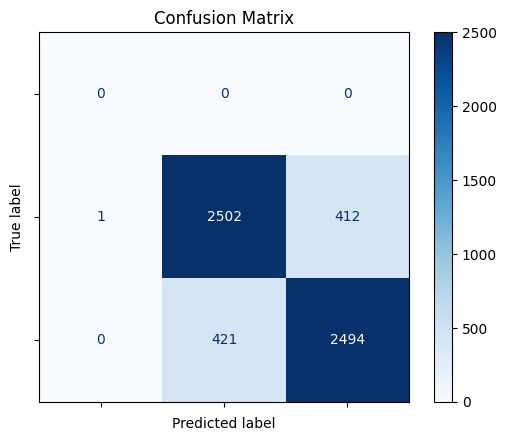

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

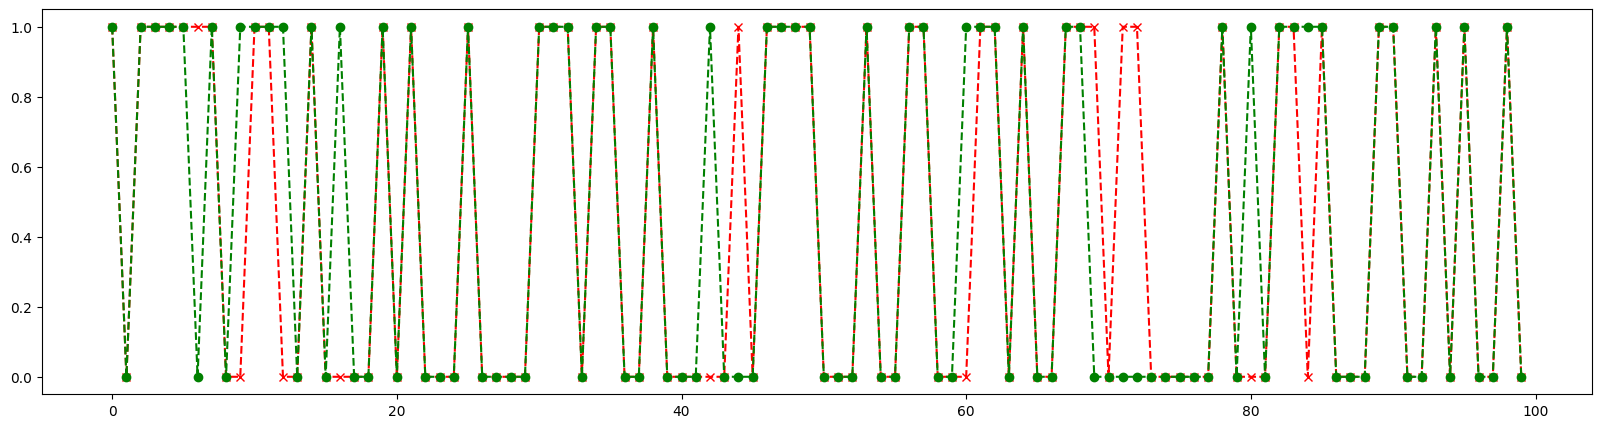

In [55]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted_classes
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()